---
#### ***Name : Ashuwin P***
#### ***Reg. No : 3122 22 5002 013***
#### ***Course : UIT2722 ~ Bio Inspired Optimization Techniques***
#### ***Topic : Genetic Algorithm - Function Optimization***
#### ***Last Update : 06 November 2024***
---

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Fitness functions
def sphere(x):
    return np.sum(x**2)


def griewank(x):
    x = np.array(x)
    sum_part = np.sum(x**2) / 4000
    prod_part = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return sum_part - prod_part + 1


def ackley(x):
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2 * np.pi * x))
    return -20 * np.exp(-0.2 * np.sqrt(sum1 / n)) - np.exp(sum2 / n) + 20 + np.exp(1)


def rosenbrock(x):
    return np.sum(100 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2)


def zakharov(x):
    sum1 = np.sum(x**2)
    sum2 = np.sum(0.5 * np.arange(1, len(x) + 1) * x)
    sum3 = np.sum(0.5 * np.arange(1, len(x) + 1) * x**2)
    return sum1 + sum2**2 + sum3**2


def rastrigin(x):
    x = np.array(x)
    n = len(x)
    return 10 * n + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))


# Function to decode a single 4-bit gene to a real value within the range [-600, 600]
def decode_gene(gene, lower_bound=-600, upper_bound=600):
    # Convert 4-bit gene to integer (0 to 15)
    gene_value = int("".join(map(str, gene)), 2)
    # Map this integer to a value in the range [-600, 600] using an interval of 80
    interval = (upper_bound - lower_bound) / 15  # Interval is 80 in this case
    return lower_bound + gene_value * interval


# Function to decode the full chromosome, assuming each gene has 4 bits
def decode_chromosome(chromosome, lower_bound=-600, upper_bound=600):
    decoded_values = []
    # Split chromosome into 4-bit genes and decode each one
    for i in range(0, len(chromosome), 4):
        gene = chromosome[i : i + 4]
        decoded_values.append(decode_gene(gene, lower_bound, upper_bound))
    return decoded_values

In [ ]:
class Chromosome:
    def __init__(self, chromosome, func):
        self.chromosome = chromosome  # Binary list representation of the chromosome
        self.fitness = None
        self.prob = None
        self.func = func  # Fitness function

    @staticmethod
    def random_chromosome(size_):
        # Generates a random chromosome of a given size
        return np.random.choice([0, 1], size=size_)

    def evaluate_fitness(self):
        # Decode the chromosome into real values and calculate fitness
        decoded_chromosome = np.array(decode_chromosome(self.chromosome))
        self.fitness = self.func(decoded_chromosome)
        return self.fitness


    def __lt__(self, other):
        # Comparison for sorting based on fitness
        return self.fitness < other.fitness

In [4]:
class GeneticAlgorithm:
    def __init__(self, population, func):
        self.population = population
        self.size = len(self.population)
        self.func = func

    def evaluation(self):
        for chromosome in self.population:
            chromosome.evaluate_fitness()

        if len(self.population) > self.size:
            self.population = sorted(self.population, key=lambda x: x.fitness)[
                : self.size
            ]
        return

    def build_roulette_wheel(self):
        total_fitness = sum(
            1 / (1 + chromosome.fitness) for chromosome in self.population
        )
        for chromosome in self.population:
            chromosome.prob = (1 / (1 + chromosome.fitness)) / total_fitness

        cumulative_distribution = []
        cdf = 0
        for chromosome in self.population:
            cdf += chromosome.prob
            cumulative_distribution.append(cdf)

        return cumulative_distribution

    def selection(self, cumulative_distribution):
        ch1, ch2 = None, None

        def select():
            n = random.random()
            for i, chromosome in enumerate(self.population):
                if n <= cumulative_distribution[i]:
                    return chromosome

        parent1 = select()
        parent2 = select()
        while np.array_equal(parent2.chromosome, parent1.chromosome):
            parent2 = select()
        return parent1, parent2

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.chromosome) - 1)

        offspring_chromosome = np.concatenate(
            (parent1.chromosome[:crossover_point], parent2.chromosome[crossover_point:])
        )

        offspring = Chromosome(offspring_chromosome, self.func)
        return offspring

    def mutation(self, offspring):
        num_mutation = 5
        m = len(offspring.chromosome)
        for i in range(num_mutation):
            idx = random.randint(0, m - 1)
            offspring.chromosome[idx] = 1 if offspring.chromosome[idx] == 0 else 0
        return offspring

    def best_value(self):
        return max(chromosome.fitness for chromosome in self.population)

In [5]:
def Run_GA(population, num_iter, func):
    GA = GeneticAlgorithm(population, func)
    values = []
    for _ in range(num_iter):
        GA.evaluation()
        if _ == num_iter - 1:
            break
        values.append(GA.best_value())
        cdf = GA.build_roulette_wheel()
        for k in range(GA.size//2):
            p1, p2 = GA.selection(cdf)
            offspring = GA.crossover(p1, p2)
            mutated_offspring = GA.mutation(offspring)
            GA.population.append(mutated_offspring)
    return values

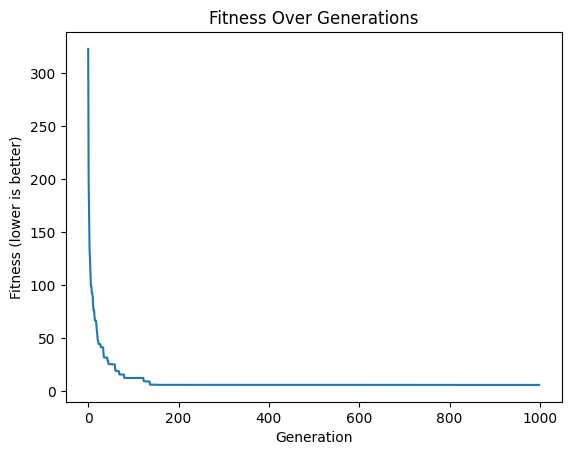

In [6]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, griewank))
logs = Run_GA(population, 1000, griewank)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

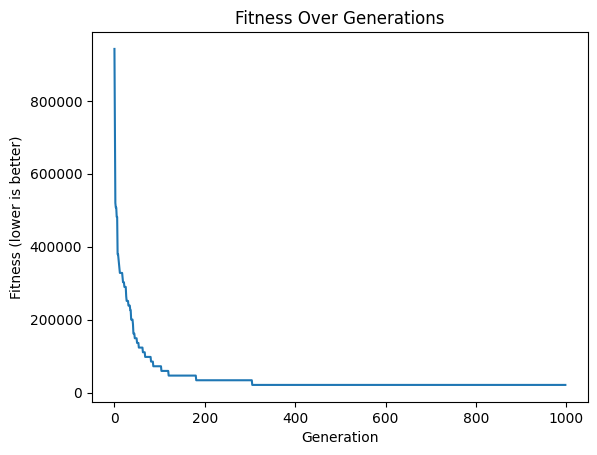

In [7]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, sphere))
logs = Run_GA(population, 1000, sphere)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

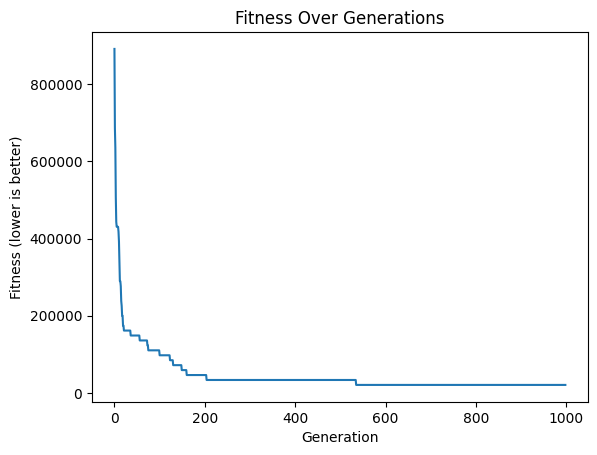

In [8]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, sphere))
logs = Run_GA(population, 1000, sphere)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

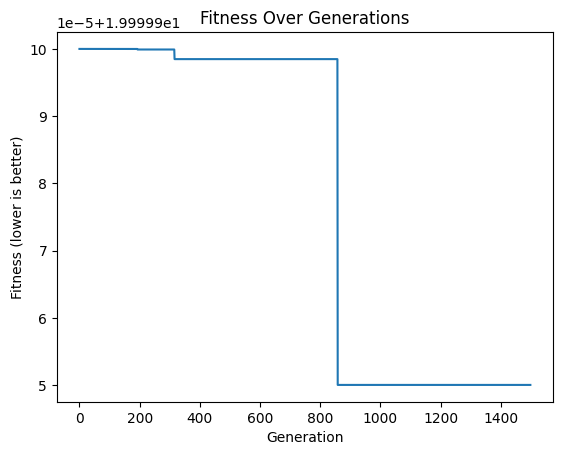

In [9]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, ackley))
logs = Run_GA(population, 1500, ackley)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

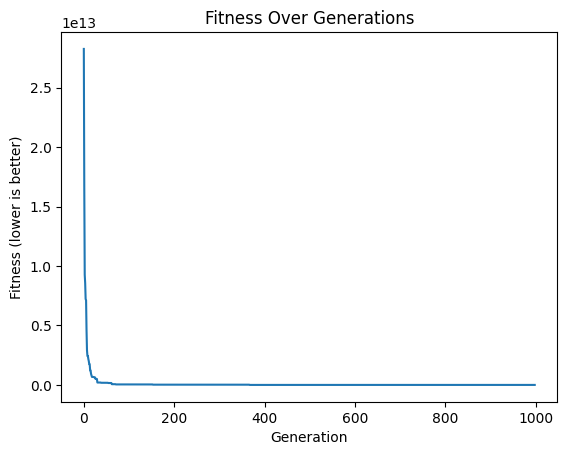

In [10]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, rosenbrock))
logs = Run_GA(population, 1000, rosenbrock)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

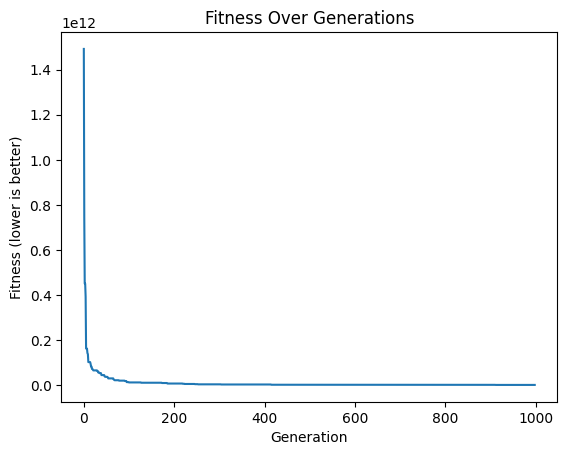

In [11]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, zakharov))
logs = Run_GA(population, 1000, zakharov)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()

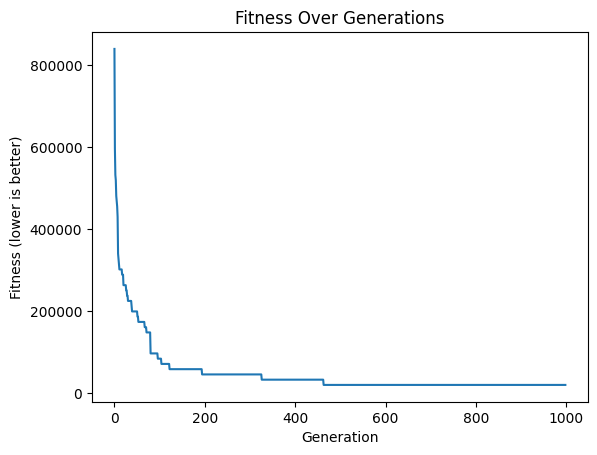

In [12]:
population_size = 10
population = []
for _ in range(population_size):
    random_chromosome = Chromosome.random_chromosome(20)  # Chromosome length of 20
    population.append(Chromosome(random_chromosome, rastrigin))
logs = Run_GA(population, 1000, rastrigin)
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.show()